In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

23.505192951969576 -26.7536841812894
-82.28612820465588 74.0963741712724
-46.51760952961579 69.09618306799578
45.86339989685101 2.8996076379862927
-1.2388748248568362 -8.017736601171862
-18.24460837047775 -3.4507001281906753
-70.39091973303786 -178.36675468858823
89.67366196282663 -154.5302356680654
11.252342619418684 69.80214219606654
75.61466641021943 -173.96613341179298
23.73676700055907 -148.34533736925343
-29.560947827900115 27.215103213658608
-48.4162535175831 164.41199895118194
-56.85631355257988 -71.17228736282509
68.30676952066301 -128.1136158082861
72.2226625958703 -128.07396878793338
-68.7279916056967 -80.60324551659265
-47.18718517674945 69.56109817222614
46.115740412054066 12.902748168044582
63.96581701400925 -92.84080700802743
47.38231741934271 73.43804873397059
-67.18123049652709 18.125547263815747
-67.1291504910744 67.22549618344493
-71.27927176264367 -44.26807468936826
22.438589985082544 -143.146500433982
30.919459384949192 168.37520650023168
-66.59152159252335 57.8378

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
                             

630

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5982fce8ddc76bb4905c922cdb6b69ca


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | chamalieres
Processing Record 5 of Set 1 | harper
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | mafeteng
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | spilimbergo
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | gulshat
City not found. Skipping...
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | severo-kurilsk


Processing Record 38 of Set 4 | visnes
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | pedasi
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | redmond
Processing Record 43 of Set 4 | daru
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | lengshuitan
Processing Record 46 of Set 4 | vila
Processing Record 47 of Set 4 | mayo
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | bac lieu
Processing Record 50 of Set 4 | razole
Processing Record 1 of Set 5 | oga
Processing Record 2 of Set 5 | tongling
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | zastron
Processing Record 5 of Set 5 | komsomolskiy
Processing Record 6 of Set 5 | meadow lake
Processing Record 7 of Set 5 | willowmore
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | entre rios
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | how

Processing Record 32 of Set 8 | erzin
Processing Record 33 of Set 8 | berbera
Processing Record 34 of Set 8 | bagdarin
Processing Record 35 of Set 8 | miraflores
Processing Record 36 of Set 8 | mayuge
Processing Record 37 of Set 8 | yamasaki
Processing Record 38 of Set 8 | burnie
Processing Record 39 of Set 8 | juan lacaze
Processing Record 40 of Set 8 | sabha
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | tezu
Processing Record 43 of Set 8 | kabanjahe
Processing Record 44 of Set 8 | bendigo
Processing Record 45 of Set 8 | sampit
Processing Record 46 of Set 8 | varadero
Processing Record 47 of Set 8 | bougouni
Processing Record 48 of Set 8 | bunia
Processing Record 49 of Set 8 | selikhino
Processing Record 50 of Set 8 | barzas
Processing Record 1 of Set 9 | aligudarz
Processing Record 2 of Set 9 | cotacachi
Processing Record 3 of Set 9 | weligama
Processing Record 4 of Set 9 | dire
Processing Record 5 of Set 9 | kushima
Processing Record 6 of Set 9 | ialibu
Pro

City not found. Skipping...
Processing Record 23 of Set 12 | karpogory
Processing Record 24 of Set 12 | garden city
Processing Record 25 of Set 12 | sassandra
Processing Record 26 of Set 12 | coyah
Processing Record 27 of Set 12 | leh
Processing Record 28 of Set 12 | copiapo
Processing Record 29 of Set 12 | yangshe
Processing Record 30 of Set 12 | tigil
Processing Record 31 of Set 12 | san cristobal
Processing Record 32 of Set 12 | wajir
Processing Record 33 of Set 12 | covasna
Processing Record 34 of Set 12 | sinnamary
Processing Record 35 of Set 12 | aneza
Processing Record 36 of Set 12 | ipixuna
Processing Record 37 of Set 12 | bubaque
Processing Record 38 of Set 12 | san joaquin
Processing Record 39 of Set 12 | hay river
Processing Record 40 of Set 12 | duldurga
Processing Record 41 of Set 12 | puerto escondido
Processing Record 42 of Set 12 | brae
Processing Record 43 of Set 12 | dubbo
Processing Record 44 of Set 12 | gurupi
Processing Record 45 of Set 12 | palmer
Processing Recor

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.6667,-17.1000,73.00,83,16,4.63,PT,2022-07-17 22:48:40
1,Souillac,-20.5167,57.5167,68.38,77,20,14.97,MU,2022-07-17 22:48:41
2,Chamalieres,45.7756,3.0631,65.12,59,0,2.59,FR,2022-07-17 22:48:41
3,Harper,4.3750,-7.7169,75.60,79,99,11.68,LR,2022-07-17 22:48:42
4,Jamestown,42.0970,-79.2353,71.02,85,75,5.99,US,2022-07-17 22:46:40
5,Vaini,-21.2000,-175.2000,77.16,88,75,9.22,TO,2022-07-17 22:48:42
6,Barrow,71.2906,-156.7887,41.02,87,100,14.97,US,2022-07-17 22:48:43
7,Kavaratti,10.5669,72.6420,81.70,76,100,19.73,IN,2022-07-17 22:48:43
8,Hilo,19.7297,-155.0900,92.28,73,100,13.80,US,2022-07-17 22:48:44
9,Mafeteng,-29.8230,27.2374,44.76,39,0,4.61,LS,2022-07-17 22:48:44


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-07-17 22:48:40,32.6667,-17.1000,73.00,83,16,4.63
1,Souillac,MU,2022-07-17 22:48:41,-20.5167,57.5167,68.38,77,20,14.97
2,Chamalieres,FR,2022-07-17 22:48:41,45.7756,3.0631,65.12,59,0,2.59
3,Harper,LR,2022-07-17 22:48:42,4.3750,-7.7169,75.60,79,99,11.68
4,Jamestown,US,2022-07-17 22:46:40,42.0970,-79.2353,71.02,85,75,5.99
5,Vaini,TO,2022-07-17 22:48:42,-21.2000,-175.2000,77.16,88,75,9.22
6,Barrow,US,2022-07-17 22:48:43,71.2906,-156.7887,41.02,87,100,14.97
7,Kavaratti,IN,2022-07-17 22:48:43,10.5669,72.6420,81.70,76,100,19.73
8,Hilo,US,2022-07-17 22:48:44,19.7297,-155.0900,92.28,73,100,13.80
9,Mafeteng,LS,2022-07-17 22:48:44,-29.8230,27.2374,44.76,39,0,4.61


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

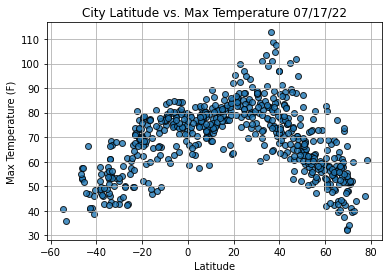

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

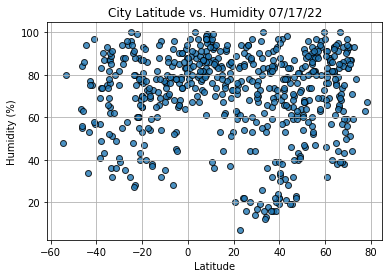

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

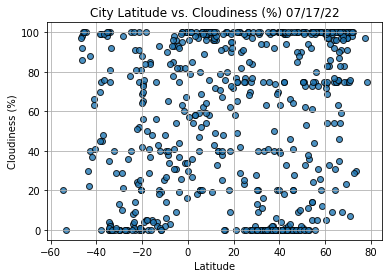

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

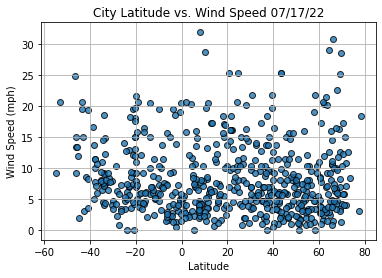

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Perform linear regression.
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2022-07-17 22:48:46
Lat                       69.4541
Lng                     -133.0374
Max Temp                     66.2
Humidity                       59
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object

In [23]:
city_data_df["Lat"]>=0

0       True
1      False
2       True
3       True
4       True
       ...  
583     True
584    False
585     True
586     True
587    False
Name: Lat, Length: 588, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2022-07-17 22:48:40,32.6667,-17.1000,73.00,83,16,4.63
2,Chamalieres,FR,2022-07-17 22:48:41,45.7756,3.0631,65.12,59,0,2.59
3,Harper,LR,2022-07-17 22:48:42,4.3750,-7.7169,75.60,79,99,11.68
4,Jamestown,US,2022-07-17 22:46:40,42.0970,-79.2353,71.02,85,75,5.99
6,Barrow,US,2022-07-17 22:48:43,71.2906,-156.7887,41.02,87,100,14.97


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

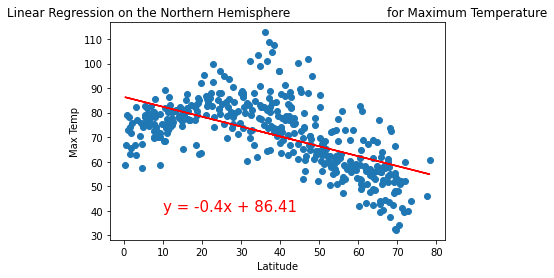

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

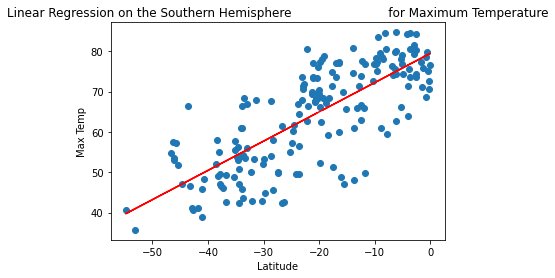

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(50,20))

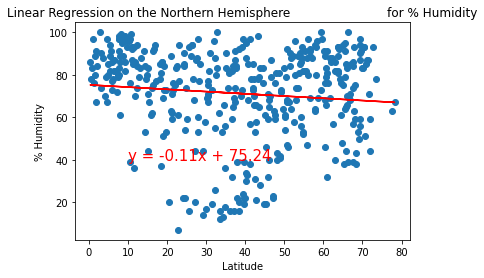

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

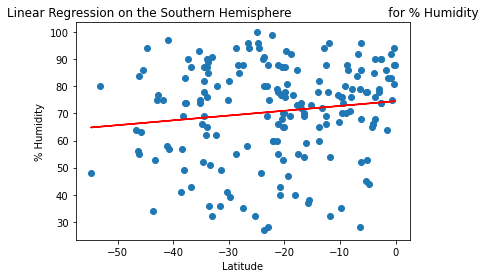

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

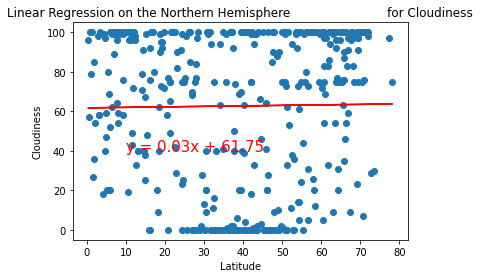

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

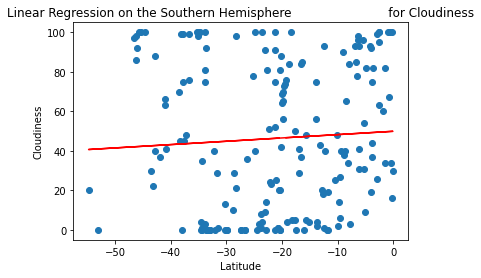

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,60))

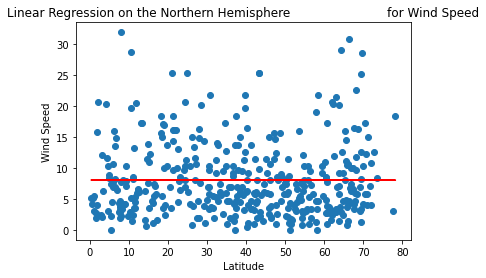

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

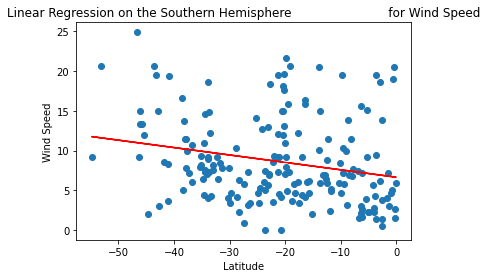

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))